In [1]:
pwd

'/mmfs1/scratch/dsu.local/bshakya/scratch/bshakya/RT-DETR/utils'

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pdb
import os
from pycocotools.coco import COCO
from skimage import io

In [8]:
ls ../../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json

../../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json


In [4]:
import json

# Path to your JSON file
file_path = '../../data/VisDrone2COCO/COCO/annotations/visdrone_coco_test.json'

# Open and load JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract image dimensions
image_dimensions = [(img['width'], img['height']) for img in data['images']]
print("Max Image Dimension: ", max(image_dimensions))
print("Min Image Dimension: ", min(image_dimensions))
# Calculate sizes (area)
image_sizes = [width * height for width, height in image_dimensions]

# Compute statistics
max_size = max(image_sizes)
min_size = min(image_sizes)
avg_size = sum(image_sizes) / len(image_sizes)

# Print results
print(f"Maximum image size: {max_size} pixels")
print(f"Minimum image size: {min_size} pixels")
print(f"Average image size: {avg_size:.2f} pixels")


Max Image Dimension:  (1920, 1080)
Min Image Dimension:  (960, 540)
Maximum image size: 2073600 pixels
Minimum image size: 518400 pixels
Average image size: 1253258.54 pixels


In [13]:
src_root = '/mmfs1/scratch/dsu.local/bshakya/scratch/bshakya/'
src_file = src_root+'data/VisDrone2COCO/COCO/annotations/instances_train2017.json'
#src_desc = 'DOTAv1.5' 

coco_obj = COCO(src_file)

loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


In [14]:
with open(src_file, 'r') as f:
    root = json.load(f)

root.keys()

dict_keys(['images', 'annotations', 'categories'])

In [18]:
n_images = len(root['images'])
n_boxes = len(root['annotations'])
n_categ = len(root['categories'])

heights = [x['height'] for x in root['images']]
widths = [x['width'] for x in root['images']]
areas = [x['area'] for x in root['annotations']]

#print('Dataset Name: ',src_desc)
print('Number of images: ',n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categ)
print('Max Min Avg Height: ', max(heights), min(heights), int(sum(heights)/len(heights)))
print('Max Min Avg Width: ', max(widths), min(widths), int(sum(widths)/len(widths)))
print('Max Min Avg Area: ', max(areas), min(areas), int(sum(areas)/len(areas)))

Number of images:  6471
Number of bounding boxes:  353550
Number of classes:  11
Max Min Avg Height:  1500 360 1002
Max Min Avg Width:  2000 480 1519
Max Min Avg Area:  328640 0 2490


In [22]:
import os
import numpy as np

# Path to the folder containing VisDrone .txt annotation files
ann_dir = "../../yolov9/datasets/VisDrone/VisDrone2019-DET-train/annotations"

widths = []
heights = []
areas = []

for fname in os.listdir(ann_dir):
    if not fname.endswith(".txt"):
        continue
    with open(os.path.join(ann_dir, fname), "r") as f:
        for line in f:
            parts = line.strip().split(",")
            # x_min, y_min, w, h are the first four entries
            w, h = float(parts[2]), float(parts[3])
            widths.append(w)
            heights.append(h)
            areas.append(w * h)

widths = np.array(widths)
heights = np.array(heights)
areas = np.array(areas)

print(f"Width  — min: {widths.min():.1f}px, max: {widths.max():.1f}px,  avg: {widths.mean():.1f}px")
print(f"Height — min: {heights.min():.1f}px, max: {heights.max():.1f}px, avg: {heights.mean():.1f}px")
print(f"Area   — min: {areas.min():.1f}px², max: {areas.max():.1f}px², avg: {areas.mean():.1f}px²")


Width  — min: 2.0px, max: 1424.0px,  avg: 39.1px
Height — min: 0.0px, max: 790.0px, avg: 37.5px
Area   — min: 0.0px², max: 328640.0px², avg: 2490.8px²


In [20]:
# Objects per image distribution

img2nboxes = {} 

for ann in root['annotations']:
    img_id = ann['image_id']
    
    if img_id in img2nboxes.keys():
        img2nboxes[img_id] += 1
    else:
        img2nboxes[img_id] = 1

nboxes_list = list(img2nboxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = int(sum(nboxes_list)/len(nboxes_list))
print("Min box count:", min_nboxes)
print("Max box count:", max_nboxes)
print("Avg box count:", avg_nboxes)

Min box count: 1
Max box count: 914
Avg box count: 54


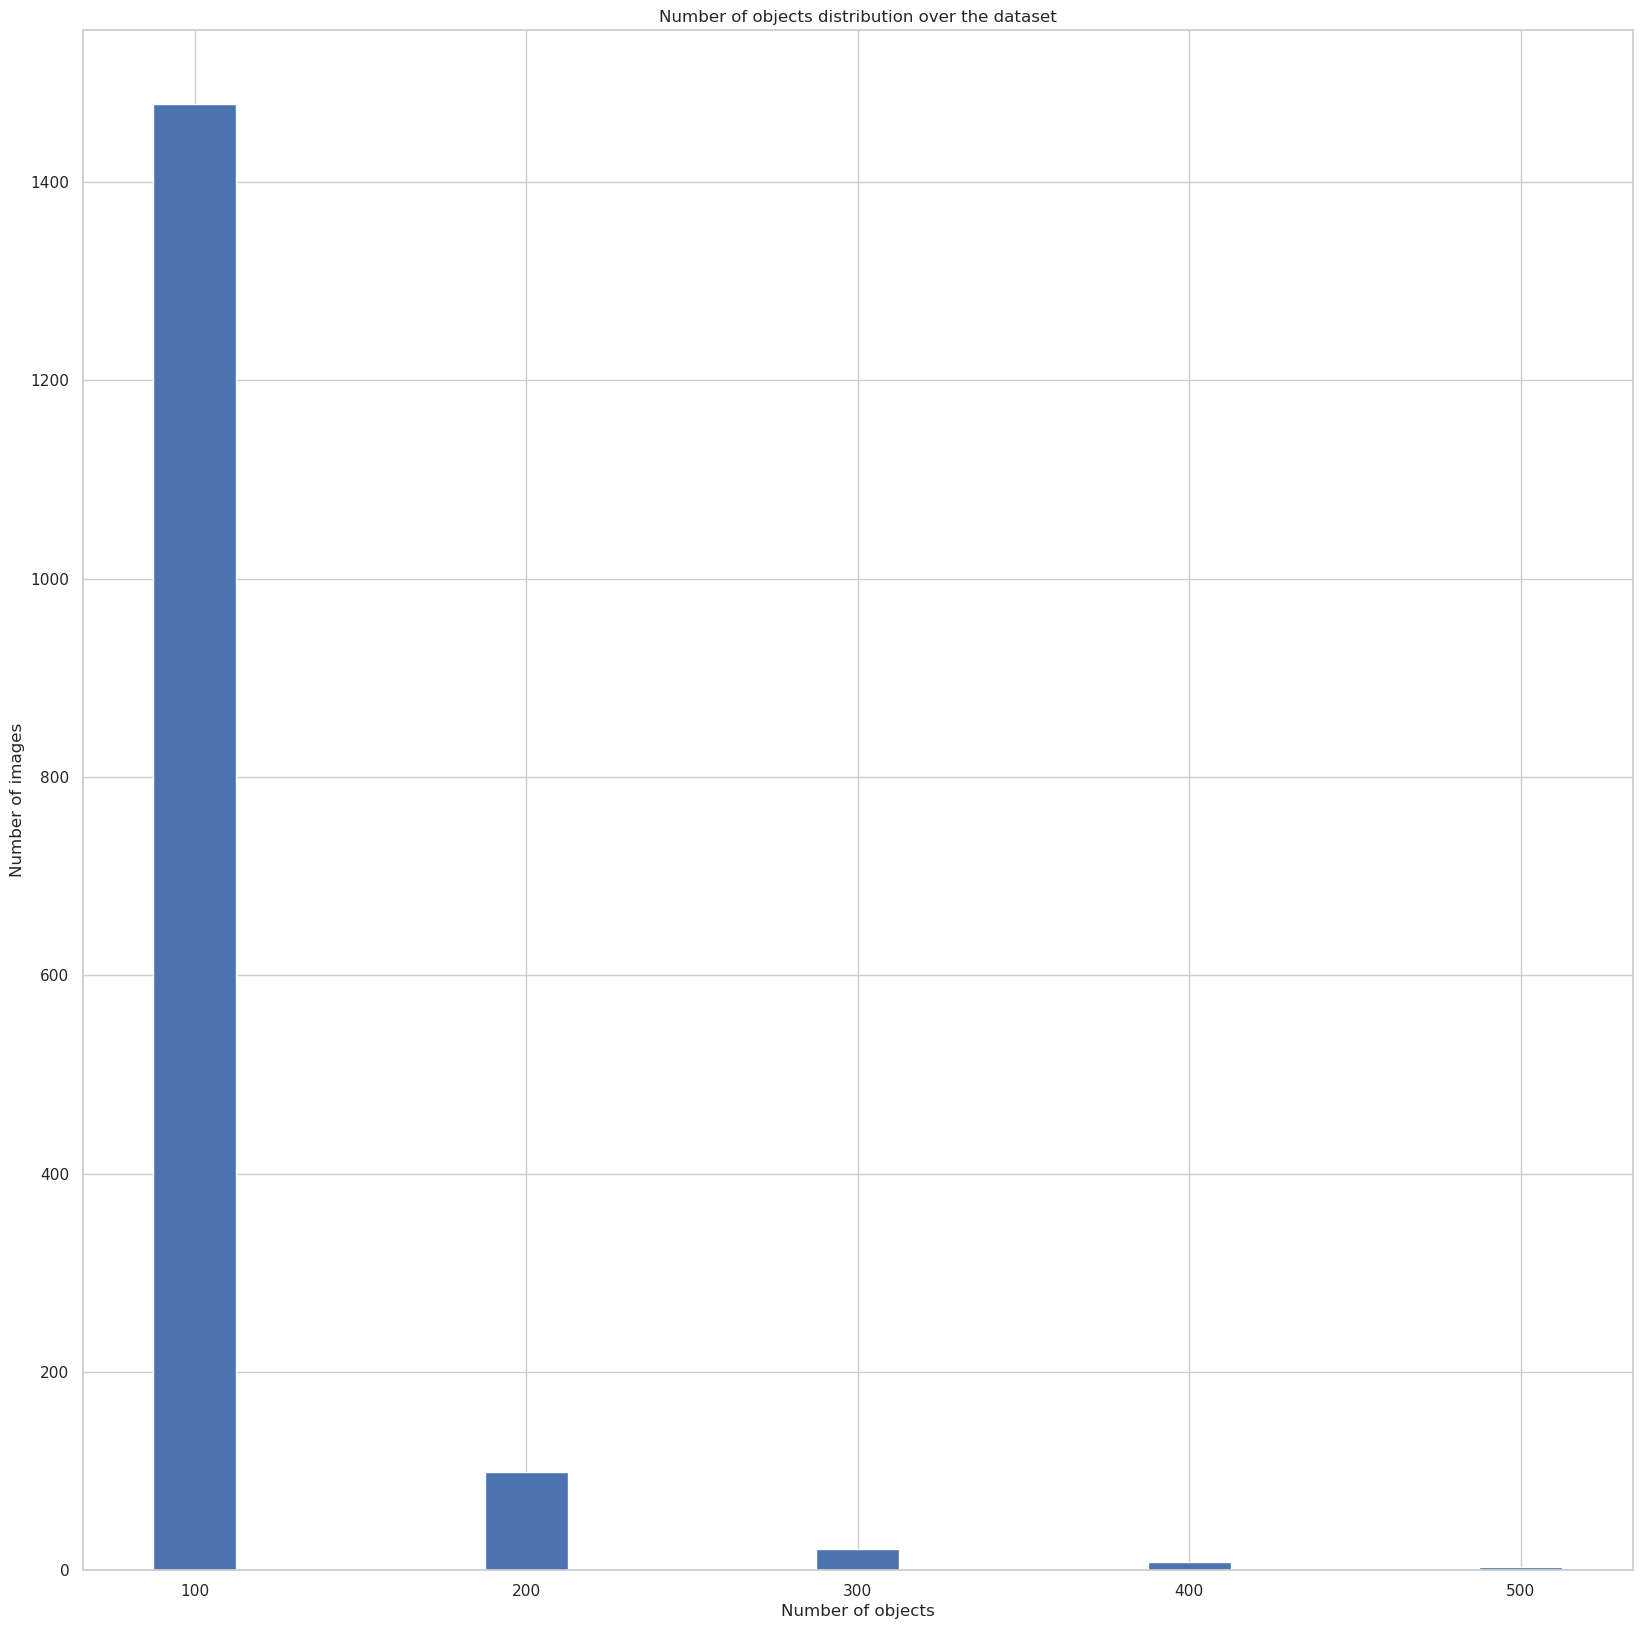

Number of images having atleast one box:  1610
Min number of boxes per image:  1
Max number of boxes per image:  498
Avg number of boxes per image:  48


In [90]:
out = pd.cut(nboxes_list, bins=np.arange(0,max_nboxes+10,100), include_lowest=True)

counts = out.value_counts().values
labels = [(int(i.left),int(i.right)) for i in out.value_counts().index.categories]

graph_xind = [i[0] for i in labels] 
# ticks = [ '('+str(i[0])+','+ str(i[1])+')' for i in labels]
ticks = [str(i[1]) for i in labels]

plt.figure(figsize=(20,20))
plt.bar(graph_xind, counts, tick_label=ticks, width=25)
plt.xlabel('Number of objects')
plt.ylabel('Number of images')
plt.title('Number of objects distribution over the dataset')
plt.show()

print("Number of images having atleast one box: ", len(nboxes_list))
print("Min number of boxes per image: ", min_nboxes)
print("Max number of boxes per image: ", max_nboxes)
print("Avg number of boxes per image: ", avg_nboxes)

In [84]:
ls ../../YOLOX/datasets/COCO_back/annotations

instances_dev2017.json  instances_train2017.json  instances_val2017.json


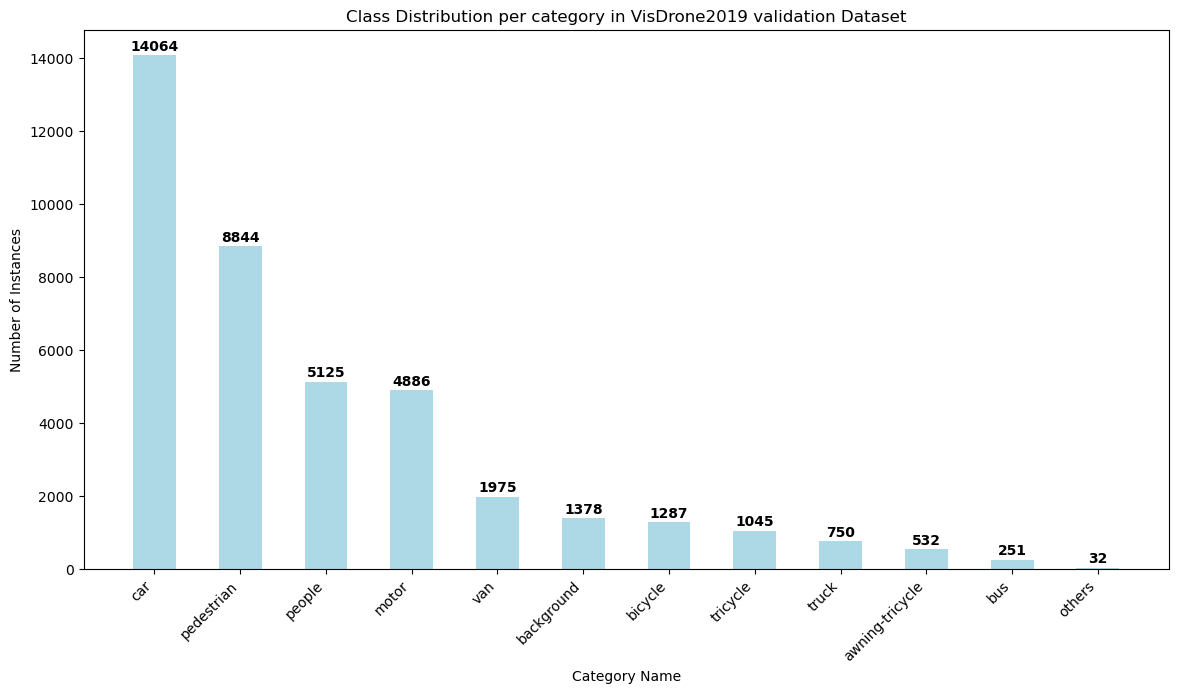


Category Mapping:
1 -> pedestrian, 2 -> people, 3 -> bicycle, 4 -> car, 5 -> van, 6 -> truck, 7 -> tricycle, 8 -> awning-tricycle, 9 -> bus, 10 -> motor, 11 -> others, 

In [18]:
# Class distribution per category
import json
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Compute Class Distribution
class2nboxes = {}

save_folder = "../../YOLOX/datasets/COCO_back/results"

for ann in root['annotations']:
    cat_id = ann['category_id']
    class2nboxes[cat_id] = class2nboxes.get(cat_id, 0) + 1

# Step 2: Sort by the Number of Instances (Descending)
sorted_c2nb = sorted(class2nboxes.items(), key=lambda item: item[1], reverse=True)

# Step 3: Get the Top 20 Classes
top = min(len(sorted_c2nb), 20)
y = [i[1] for i in sorted_c2nb[:top]]
x = [i[0] for i in sorted_c2nb[:top]]  # Category IDs

# Step 4: Map Category IDs to Names
categ_map = {x['id']: x['name'] for x in root['categories']}
x_labels = [categ_map.get(cat_id, "background") for cat_id in x]  # Use names if available


# Step 5: Plot Bar Graph
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(y)), y, width=0.5, tick_label=x_labels, color='lightblue')

# Add Total Count on Top of Each Bar
for bar, count in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Improve Plot Readability
plt.xticks(rotation=45, ha="right")
#plt.yticks(fontsize=10)
plt.xlabel("Category Name")
plt.ylabel("Number of Instances")
plt.title("Class Distribution per category in VisDrone2019 validation Dataset")

plot_filename = os.path.join(save_folder, "visdrone_class_distribution_test.png")
plt.savefig(plot_filename, bbox_inches="tight")
# Show Plot
plt.show()

# Print Category Mapping
print("\nCategory Mapping:")
for k in categ_map.keys():
    print(f"{k} -> {categ_map[k]}", end=", ")


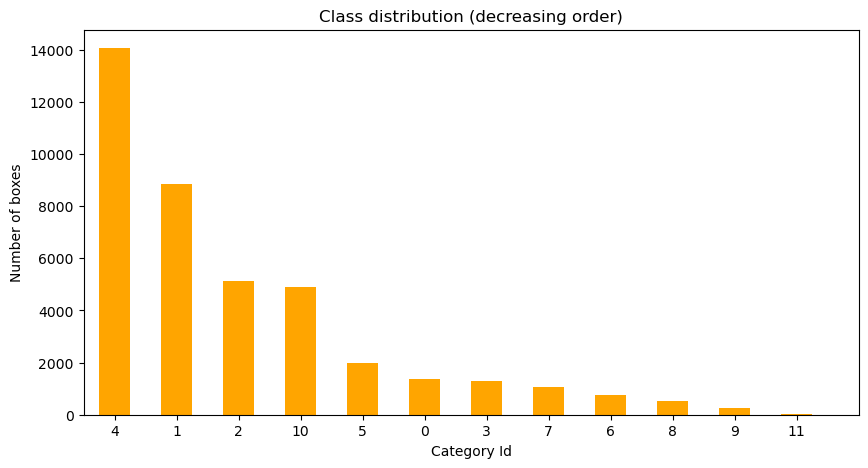

1 -> pedestrian, 2 -> people, 3 -> bicycle, 4 -> car, 5 -> van, 6 -> truck, 7 -> tricycle, 8 -> awning-tricycle, 9 -> bus, 10 -> motor, 11 -> others, 

In [15]:
# Class distribution per category
class2nboxes = {} 

for ann in root['annotations']:
    cat_id = ann['category_id']
    
    if cat_id in class2nboxes.keys():
        class2nboxes[cat_id] += 1
    else:
        class2nboxes[cat_id] = 1

sorted_c2nb = [(k,v)for k, v in sorted(class2nboxes.items(), reverse=True, key=lambda item: item[1])]

# top 20 classes
top = min(len(sorted_c2nb),20)

# to plot
y = [i[1] for i in sorted_c2nb[:top]]
x = [i[0] for i in sorted_c2nb[:top]]

plt.figure(figsize=(10,5))
plt.bar(np.arange(len(y)),y, width=0.5,tick_label=x,color='orange')
plt.xlim(-0.5,len(y))
plt.xlabel('Category Id')
plt.ylabel('Number of boxes')
plt.title('Class distribution (decreasing order)')
plt.show()



categ_map = {x['id']: x['name'] for x in root['categories']}
for k in categ_map.keys():
    print(k,'->',categ_map[k], end=", ")

Generating plot for small objects...


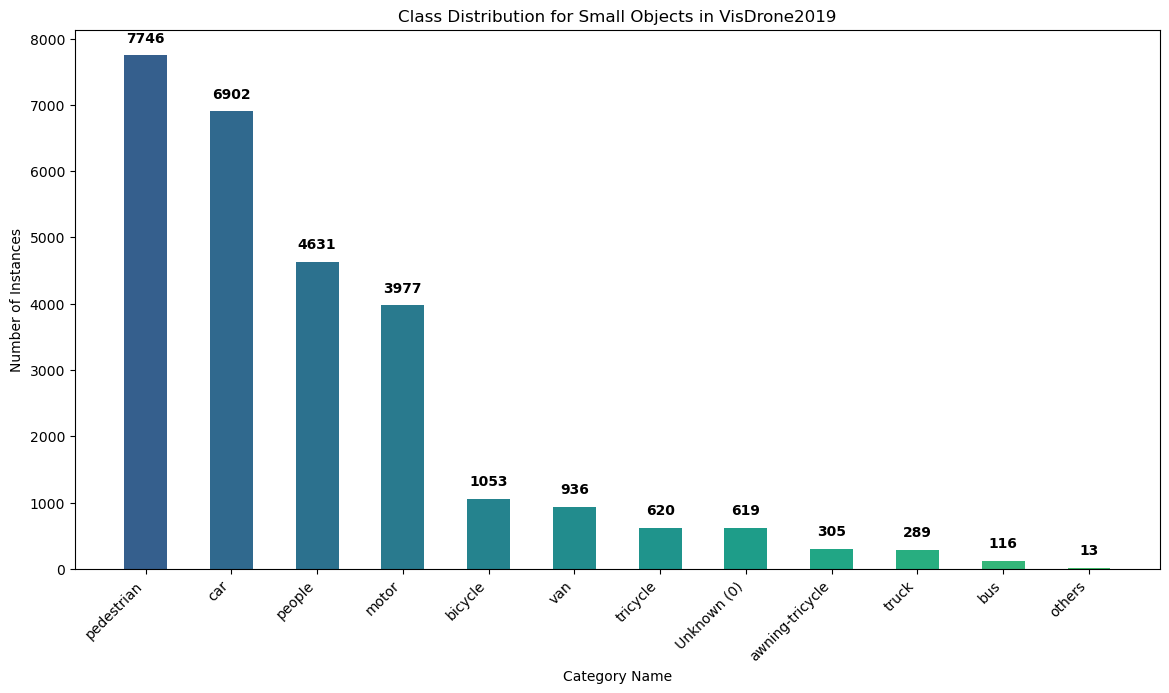

Generating plot for medium objects...


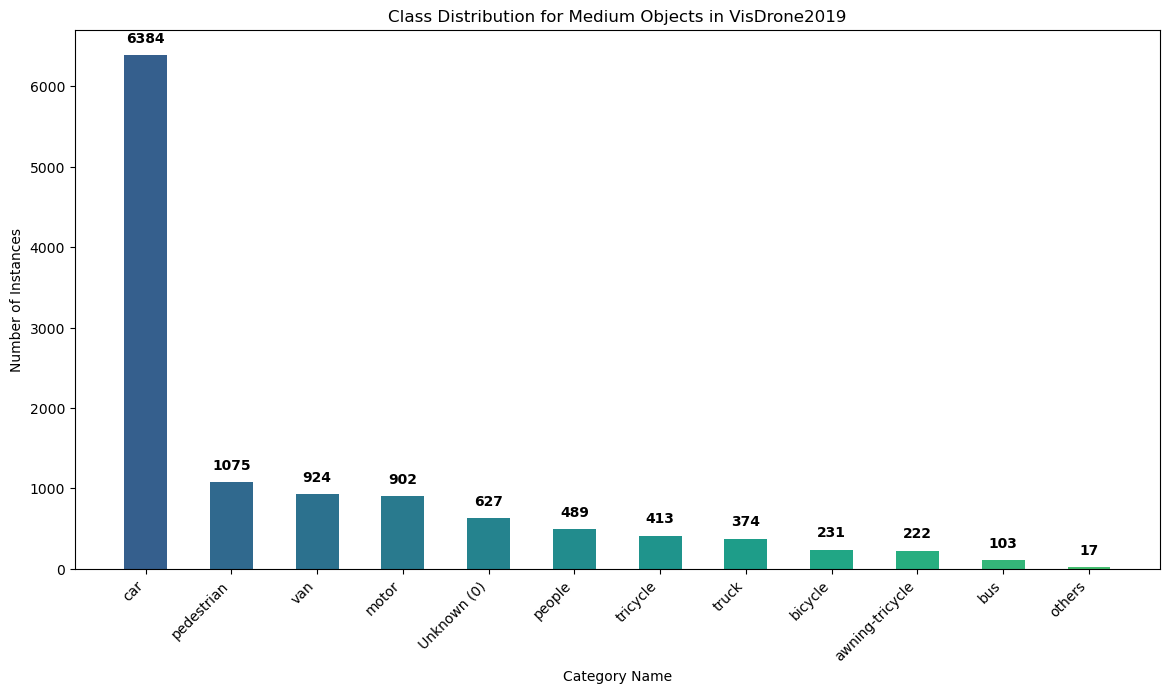

Generating plot for large objects...


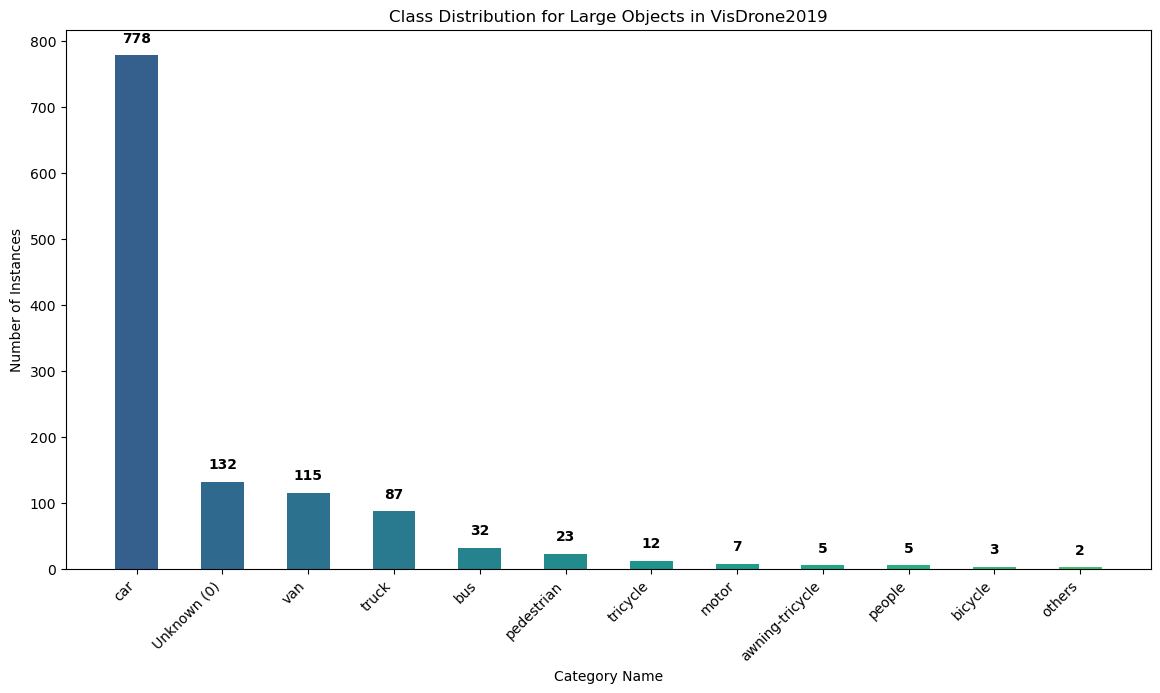


Category Mapping:
1 -> pedestrian, 2 -> people, 3 -> bicycle, 4 -> car, 5 -> van, 6 -> truck, 7 -> tricycle, 8 -> awning-tricycle, 9 -> bus, 10 -> motor, 11 -> others, 

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

# Load COCO JSON file
coco_json_path = "../../YOLOX/datasets/COCO_back/annotations/instances_val2017.json"  # Change to actual path
save_folder = "../../YOLOX/datasets/COCO_back/results"
os.makedirs(save_folder, exist_ok=True)

with open(coco_json_path, 'r') as f:
    root = json.load(f)

# Define size thresholds (change as needed)
small_threshold = 32**2   # Example: 32x32 pixels
large_threshold = 96**2   # Example: 96x96 pixels

# Step 1: Compute Class Distribution for Different Object Sizes
class2size_dist = {
    "small": {},
    "medium": {},
    "large": {}
}

for ann in root['annotations']:
    cat_id = ann['category_id']
    bbox = ann['bbox']  # Format: [x, y, width, height]
    area = bbox[2] * bbox[3]  # Width * Height

    # Determine size category
    if area < small_threshold:
        size_category = "small"
    elif area <= large_threshold:
        size_category = "medium"
    else:
        size_category = "large"

    # Increment category count
    class2size_dist[size_category][cat_id] = class2size_dist[size_category].get(cat_id, 0) + 1

# Step 2: Map Category IDs to Names
categ_map = {cat['id']: cat['name'] for cat in root.get('categories', [])}

# Function to plot bar charts
def plot_class_distribution(size_category, class_distribution):
    sorted_c2nb = sorted(class_distribution.items(), key=lambda item: item[1], reverse=True)

    # Get the Top 20 Classes
    top = min(len(sorted_c2nb), 20)
    y = [i[1] for i in sorted_c2nb[:top]]
    x = [i[0] for i in sorted_c2nb[:top]]  # Category IDs
    x_labels = [categ_map.get(cat_id, f"Unknown ({cat_id})") for cat_id in x]

    # Plot Bar Graph
    plt.figure(figsize=(14, 7))
    colors = plt.cm.viridis(np.linspace(0.3, 0.7, len(y)))  # Use colormap for variation
    bars = plt.bar(np.arange(len(y)), y, width=0.5, tick_label=x_labels, color=colors)

    # Add Total Count on Top of Each Bar
    for bar, count in zip(bars, y):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(y) * 0.02,
                 str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Improve Plot Readability
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Category Name")
    plt.ylabel("Number of Instances")
    plt.title(f"Class Distribution for {size_category.capitalize()} Objects in VisDrone2019")

    # Save and Show Plot
    plot_filename = os.path.join(save_folder, f"visdrone_class_distribution_{size_category}.png")
    plt.savefig(plot_filename, bbox_inches="tight")
    plt.show()

# Step 3: Generate Bar Charts for Each Size Category
for size in ["small", "medium", "large"]:
    print(f"Generating plot for {size} objects...")
    plot_class_distribution(size, class2size_dist[size])

# Print Category Mapping
print("\nCategory Mapping:")
for k, v in categ_map.items():
    print(f"{k} -> {v}", end=", ")


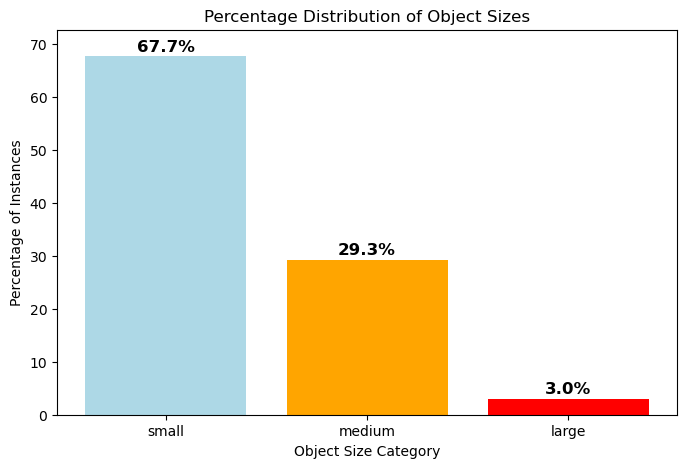

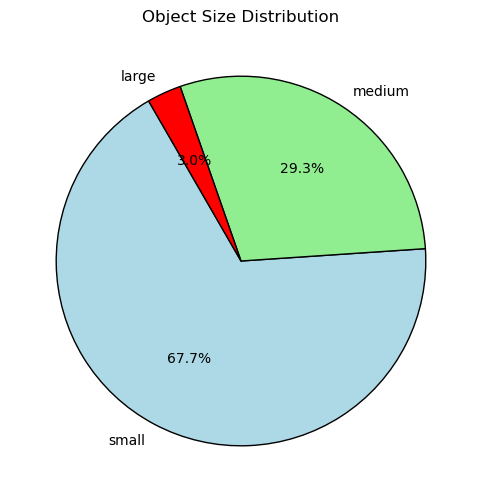


Object Size Distribution:
Small: 67.73%
Medium: 29.28%
Large: 2.99%


In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

# Load COCO JSON file
coco_json_path = "../../YOLOX/datasets/COCO_back/annotations/instances_val2017.json"  # Change to actual path
save_folder = "../../YOLOX/datasets/COCO_back/results"
os.makedirs(save_folder, exist_ok=True)

with open(coco_json_path, 'r') as f:
    root = json.load(f)

# Define size thresholds (change as needed)
small_threshold = 32**2   # Example: 32x32 pixels
large_threshold = 96**2   # Example: 96x96 pixels

# Step 1: Compute Object Count per Size Category
size_counts = {"small": 0, "medium": 0, "large": 0}

for ann in root['annotations']:
    bbox = ann['bbox']  # Format: [x, y, width, height]
    area = bbox[2] * bbox[3]  # Width * Height

    # Categorize based on bounding box area
    if area < small_threshold:
        size_counts["small"] += 1
    elif area <= large_threshold:
        size_counts["medium"] += 1
    else:
        size_counts["large"] += 1

# Compute Total Objects
total_objects = sum(size_counts.values())

# Convert Counts to Percentages
size_percentages = {key: (value / total_objects) * 100 for key, value in size_counts.items()}

# Step 2: Generate Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(size_percentages.keys(), size_percentages.values(), color=["lightblue", "orange", "red"])
plt.xlabel("Object Size Category")
plt.ylabel("Percentage of Instances")
plt.title("Percentage Distribution of Object Sizes")
plt.ylim(0, max(size_percentages.values()) + 5)  # Adjust y-axis for readability

# Add percentage labels
for i, (size, percentage) in enumerate(size_percentages.items()):
    plt.text(i, percentage + 1, f"{percentage:.1f}%", ha="center", fontsize=12, fontweight="bold")

# Save and Show Bar Chart
bar_chart_path = os.path.join(save_folder, "object_size_distribution_bar.png")
plt.savefig(bar_chart_path, bbox_inches="tight")
plt.show()

# Step 3: Generate Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(size_percentages.values(), labels=size_percentages.keys(), autopct="%1.1f%%", 
        colors=["lightblue", "lightgreen", "red"], startangle=120, wedgeprops={"edgecolor": "black"})

plt.title("Object Size Distribution")
pie_chart_path = os.path.join(save_folder, "object_size_distribution_pie.png")
plt.savefig(pie_chart_path, bbox_inches="tight")
plt.show()

# Print Percentage Breakdown
print("\nObject Size Distribution:")
for size, percentage in size_percentages.items():
    print(f"{size.capitalize()}: {percentage:.2f}%")

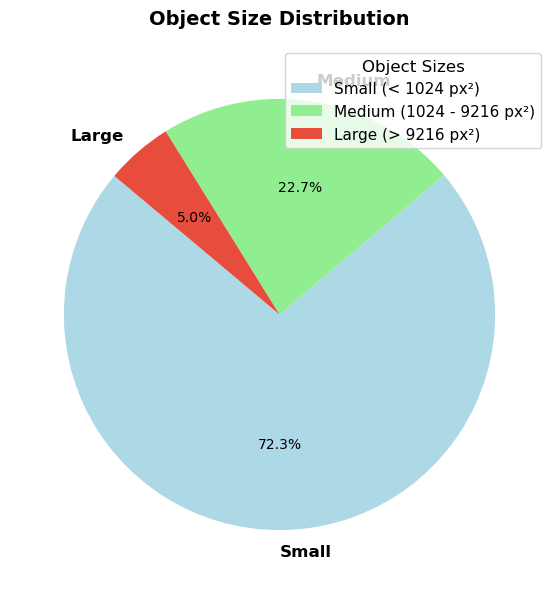

In [56]:
import json
import matplotlib.pyplot as plt

def load_coco_json(coco_json_path):
    """ Load COCO JSON file. """
    with open(coco_json_path, 'r') as f:
        return json.load(f)

def count_bounding_boxes_by_size(coco_json_path, small_threshold=32**2, large_threshold=96**2):
    """
    Count the total number of bounding boxes and categorize them based on size.

    Args:
        coco_json_path (str): Path to the COCO JSON file.
        small_threshold (int): Area threshold for small objects (default: 32x32 pixels).
        large_threshold (int): Area threshold for large objects (default: 96x96 pixels).

    Returns:
        dict: Dictionary containing total count of small, medium, and large bounding boxes.
    """
    # Load COCO JSON file
    coco_data = load_coco_json(coco_json_path)

    # Initialize counters for small, medium, and large objects
    bbox_size_counts = {"Small": 0, "Medium": 0, "Large": 0}

    # Iterate over annotations to categorize bounding boxes by size
    for ann in coco_data['annotations']:
        bbox = ann['bbox']  # Format: [x, y, width, height]
        area = bbox[2] * bbox[3]  # Width * Height

        # Categorize based on bounding box area
        if area < small_threshold:
            bbox_size_counts["Small"] += 1
        elif area <= large_threshold:
            bbox_size_counts["Medium"] += 1
        else:
            bbox_size_counts["Large"] += 1

    return bbox_size_counts  # Return counts for further processing

# Example Usage
coco_json_path = "../../YOLOX/datasets/DOTAv1.5/annotations/DOTA_1.5_val.json"  # Update path
bbox_counts_by_size = count_bounding_boxes_by_size(coco_json_path)
font_family = "Calibri"  # Change this to your preferred font (e.g., "Times New Roman", "Calibri")

# Step 2: Convert counts to percentages
total_boxes = sum(bbox_counts_by_size.values())
size_percentages = {k: (v / total_boxes) * 100 for k, v in bbox_counts_by_size.items()}

# Step 3: Beautified Pie Chart
plt.figure(figsize=(7, 7))
colors = ["lightblue", "lightgreen", "#e74c3c"]  # Blue, Green, Red
wedges, texts, autotexts = plt.pie(
    size_percentages.values(), labels=size_percentages.keys(), autopct="%1.1f%%",
    colors=colors, startangle=140,
    textprops={"fontsize": 12}
)

# Improve text readability
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight("bold")

for autotext in autotexts:
    autotext.set_fontsize(10)
    #autotext.set_fontweight("bold")
    autotext.set_color("black")

# Add Title
plt.title("Object Size Distribution", fontsize=14, fontweight="bold", pad=15)

# Add Legend
#plt.legend(wedges, ["Small (< 1024 px²)", "Medium (1024 - 9216 px²)", "Large (> 9216 px²)"], 
#           title="Object Sizes", loc="best", fontsize=11, title_fontsize="10", frameon=True)

# Add Legend at Top-Right Position
plt.legend(
    wedges, 
    ["Small (< 1024 px²)", "Medium (1024 - 9216 px²)", "Large (> 9216 px²)"], 
    title="Object Sizes", loc="upper right", fontsize=11, title_fontsize="12", frameon=True
)


# Save & Show Plot
plt.savefig("../../YOLOX/datasets/COCO_back/results/size_distribution_pie_chart.png", bbox_inches="tight", dpi=300)
plt.show()


In [49]:
ls ../../YOLOX/datasets/DOTAv1.5/annotations/DOTA_1.5_train.json

../../YOLOX/datasets/DOTAv1.5/annotations/DOTA_1.5_train.json


In [55]:
import json

def load_coco_json(coco_json_path):
    """ Load COCO JSON file. """
    with open(coco_json_path, 'r') as f:
        return json.load(f)

def count_bounding_boxes_by_size(coco_json_path, small_threshold=32**2, large_threshold=96**2):
    """
    Count the total number of bounding boxes and categorize them based on size.

    Args:
        coco_json_path (str): Path to the COCO JSON file.
        small_threshold (int): Area threshold for small objects (default: 32x32 pixels).
        large_threshold (int): Area threshold for large objects (default: 96x96 pixels).

    Returns:
        dict: Dictionary containing total count of small, medium, and large bounding boxes.
    """
    # Load COCO JSON file
    coco_data = load_coco_json(coco_json_path)

    # Initialize counters for small, medium, and large objects
    bbox_size_counts = {"small": 0, "medium": 0, "large": 0}

    # Iterate over annotations to categorize bounding boxes by size
    for ann in coco_data['annotations']:
        bbox = ann['bbox']  # Format: [x, y, width, height]
        area = bbox[2] * bbox[3]  # Width * Height

        # Categorize based on bounding box area
        if area < small_threshold:
            bbox_size_counts["small"] += 1
        elif area <= large_threshold:
            bbox_size_counts["medium"] += 1
        else:
            bbox_size_counts["large"] += 1

    # Print results
    print("\nBounding Box Size Distribution:")
    print(f"Small Objects  (< {small_threshold} px²): {bbox_size_counts['small']}")
    print(f"Medium Objects (≥ {small_threshold} and ≤ {large_threshold} px²): {bbox_size_counts['medium']}")
    print(f"Large Objects  (> {large_threshold} px²): {bbox_size_counts['large']}")

    return bbox_size_counts  # Return counts for further processing if needed

# Example Usage
coco_json_path = "../../YOLOX/datasets/DOTAv1.5/annotations/DOTA_1.5_val.json"  # Update with actual path
bbox_counts_by_size = count_bounding_boxes_by_size(coco_json_path)



Bounding Box Size Distribution:
Small Objects  (< 1024 px²): 50293
Medium Objects (≥ 1024 and ≤ 9216 px²): 15768
Large Objects  (> 9216 px²): 3504


In [8]:
ls ../../YOLOX/datasets/COCO_back/val2017

0000001_02999_d_0000005.jpg  0000280_02201_d_0000623.jpg
0000001_03499_d_0000006.jpg  0000280_02401_d_0000624.jpg
0000001_03999_d_0000007.jpg  0000280_02601_d_0000625.jpg
0000001_04527_d_0000008.jpg  0000280_02801_d_0000626.jpg
0000001_05249_d_0000009.jpg  0000280_03001_d_0000627.jpg
0000001_05499_d_0000010.jpg  0000280_03201_d_0000628.jpg
0000001_05999_d_0000011.jpg  0000280_03401_d_0000629.jpg
0000001_07999_d_0000012.jpg  0000283_00401_d_0000676.jpg
0000001_08414_d_0000013.jpg  0000283_00601_d_0000677.jpg
0000021_00000_d_0000001.jpg  0000283_00801_d_0000678.jpg
0000021_00500_d_0000002.jpg  0000283_01001_d_0000679.jpg
0000021_00800_d_0000003.jpg  0000287_00001_d_0000759.jpg
0000022_00000_d_0000004.jpg  0000287_00201_d_0000760.jpg
0000022_00500_d_0000005.jpg  0000287_00401_d_0000761.jpg
0000022_01036_d_0000006.jpg  0000287_00601_d_0000762.jpg
0000022_01251_d_0000007.jpg  0000287_00801_d_0000763.jpg
0000023_00000_d_0000008.jpg  0000287_01001_d_0000764.jpg
0000023_00300_d_0000009.jpg  00

In [4]:
ls ../../YOLOX/datasets/COCO_back/annotations/instances_val2017.json

../../YOLOX/datasets/COCO_back/annotations/instances_val2017.json


In [10]:
!python annotations_utils.py

Saved annotations for image_id 126 to annotations_image_126.json


In [9]:
!python annotations_utils.py

************Image Info*******************
{'id': 126, 'license': 1, 'height': 1080, 'width': 1920, 'file_name': '0000001_02999_d_0000005.jpg'}


Image Name:  0000280_02201_d_0000623.jpg
Image Path:  ../../YOLOX/datasets/COCO_back/val2017/0000280_02201_d_0000623.jpg


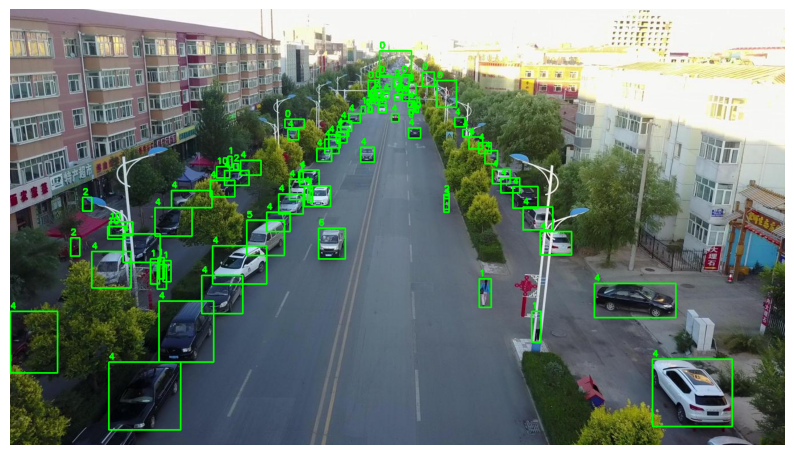

In [83]:
# Draw all bounding boxes in a specificed image_id

import json
import cv2
import matplotlib.pyplot as plt

# Load the JSON annotation file
json_path = "../../YOLOX/datasets/COCO_back/annotations/instances_val2017.json"
with open(json_path, "r") as file:
    data = json.load(file)

# Function to get image details by image_id
def get_image_info(image_id):
    for image in data["images"]:
        if image["id"] == image_id:
            return image
    return None

# Function to get annotations for a specific image_id
def get_annotations(image_id):
    return [anno for anno in data["annotations"] if anno["image_id"] == image_id]

# Specify image_id
image_id = 102 # Change this to your target image_id

# Get image details
image_info = get_image_info(image_id)
print("Image Name: ", image_info["file_name"])
if image_info is None:
    print(f"No image found with ID {image_id}")
else:
    image_path = f"../../YOLOX/datasets/COCO_back/val2017/{image_info["file_name"]}"  # Assuming image path is relative
    print(f"Image Path: ", image_path)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Could not load image: {image_path}")
    else:
        annotations = get_annotations(image_id)

        # Draw bounding boxes
        for anno in annotations:
            x, y, width, height = anno["bbox"]
            class_id = anno["category_id"]

            # Draw rectangle
            cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

            # Label with class id
            cv2.putText(image, str(class_id), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Convert image color for displaying with matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show image
        plt.figure(figsize=(10, 6))
        plt.imshow(image_rgb)
        plt.axis("off")
        plt.show()


In [23]:
# Class wise bounding box area distribution

bbox_areas = {}

for ann in root['annotations']:
    area = ann['area']
    cat_id = ann['category_id']
    
    if area <= 0.0:
        continue
    
    if cat_id in bbox_areas.keys():
        bbox_areas[cat_id].append(area)
    else:
        bbox_areas[cat_id] = [area]


bbox_avg_areas = []

for cat in bbox_areas.keys():
    areas = bbox_areas[cat]
    avg_area = int(sum(areas)/len(areas))
    
    bbox_avg_areas.append((cat,avg_area))

bbox_avg_areas = sorted(bbox_avg_areas, key = lambda x: x[1])

In [16]:
top = min(5, len(bbox_avg_areas))

plt.figure(figsize=(10,10))

y1 = [item[1] for item in bbox_avg_areas[-top:]]
x1 = [item[0] for item in bbox_avg_areas[-top:]]

y2 = [item[1] for item in bbox_avg_areas[:top]]
x2 = [item[0] for item in bbox_avg_areas[:top]]

plt.subplot(211)
plt.bar(np.arange(len(y1)),y1, width=0.25,tick_label=x1,color='green')
plt.xlim(-0.5,len(y1))
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top '+str(top)+' Classes with highest avg bounding box size')


plt.subplot(212)
plt.bar(np.arange(len(y2)),y2, width=0.25,tick_label=x2,color='blue')
plt.xlim(-0.5,len(y2))
plt.xlabel('Category Id')
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top '+str(top)+' Classes with lowest avg bounding box size')
plt.show()


categ_map = {x['id']: x['name'] for x in root['categories']}
for k in categ_map.keys():
    print(k,'->',categ_map[k], end=", ")

NameError: name 'bbox_avg_areas' is not defined

In [ ]:
y = [item[1] for item in bbox_avg_areas]
x = [item[0] for item in bbox_avg_areas]

plt.figure(figsize=(10,10))
plt.bar(np.arange(len(y)),y, width=0.25,tick_label=x,color='red')
plt.xlim(-0.5,len(y))
plt.xlabel('Category Id')
plt.ylabel('Average bounding box area in pixel squared')
plt.title('All  Classes with avg bounding box size')
plt.show()

categ_map = {x['id']: x['name'] for x in root['categories']}
for k in categ_map.keys():
    print(k,'->',categ_map[k], end=", ")

In [2]:
!python annotations_utils.py

images/9999963_00000_d_0000057.jpg: 36 bounding boxes
images/9999963_00000_d_0000006.jpg: 63 bounding boxes
images/0000078_05467_d_0000015.jpg: 3 bounding boxes
images/9999938_00000_d_0000439.jpg: 12 bounding boxes
images/9999979_00000_d_0000030.jpg: 160 bounding boxes
images/9999938_00000_d_0000200.jpg: 51 bounding boxes
images/9999938_00000_d_0000014.jpg: 26 bounding boxes
images/9999963_00000_d_0000074.jpg: 58 bounding boxes
images/9999938_00000_d_0000290.jpg: 60 bounding boxes
images/9999938_00000_d_0000070.jpg: 13 bounding boxes
images/9999952_00000_d_0000168.jpg: 31 bounding boxes
images/9999996_00000_d_0000021.jpg: 40 bounding boxes
images/9999938_00000_d_0000198.jpg: 38 bounding boxes
images/9999952_00000_d_0000216.jpg: 17 bounding boxes
images/9999938_00000_d_0000124.jpg: 34 bounding boxes
